In [2]:
%matplotlib widget
import numpy as np
import json, os, glob, numbers
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

from alvra_tools.XAS_functions2 import *

import warnings
warnings.filterwarnings('ignore')

## Reduce data

In [2]:
pgroup = 'p22588'
runnumber = 177
#runlist = [26, 27, 180]
dir2save = ''

###########################################################
reducedir='/sf/alvra/data/{}/work/Test/{}'.format(pgroup, dir2save)
xanes = XANES_reduce(pgroup, reducedir, run=runnumber)

will reduce run 177: ['run0177-PtLQ_470nm_XANES_1ps_0p7uJ']


In [4]:
channel_delay_motor = channel_delay_beckhoff

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

TT = None
saveflag = True

###########################################################
results_reduced = xanes.reduce_scan(TT, channel_delay_motor, detector_XAS_1, detector_XAS_2, detector_Izero, saveflag, tolerance=0.00001)

/sf/alvra/data/p22588/raw/run0177-PtLQ_470nm_XANES_1ps_0p7uJ/meta/scan.json
Step 35 of 35: Processing acq0035

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet          2001 / 2004 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-CVME-EVR0:DUMMY_PV3_NBS  2001 / 2004 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH1_VAL_GET     2001 / 2004 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH2_VAL_GET     2001 / 2004 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY        1999 / 2004 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-L-BECKBS:PR1_CH4_VAL_GET 2001 / 2004 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1996 / 2004 -> 0% loss
complete channels: 0 / 6 -> 100% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 986 pump and 986 unpump shots
correlation Diode1 (dark shots) = 0.9952145454675512
correlation Diode2 (dark shots) = 0.998009013330008

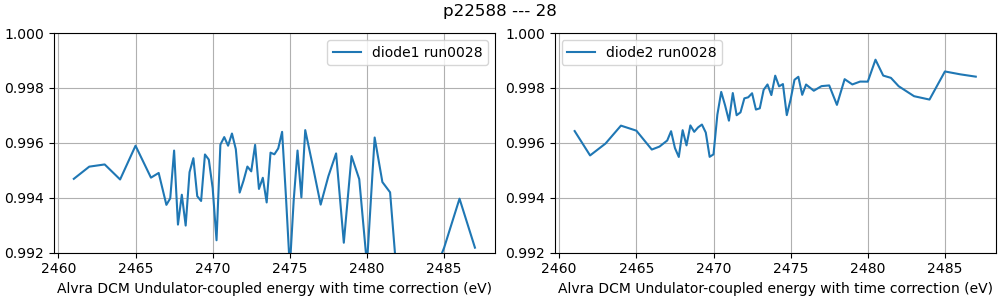

In [5]:
xanes.Plot_correlations(lowlim=0.992)

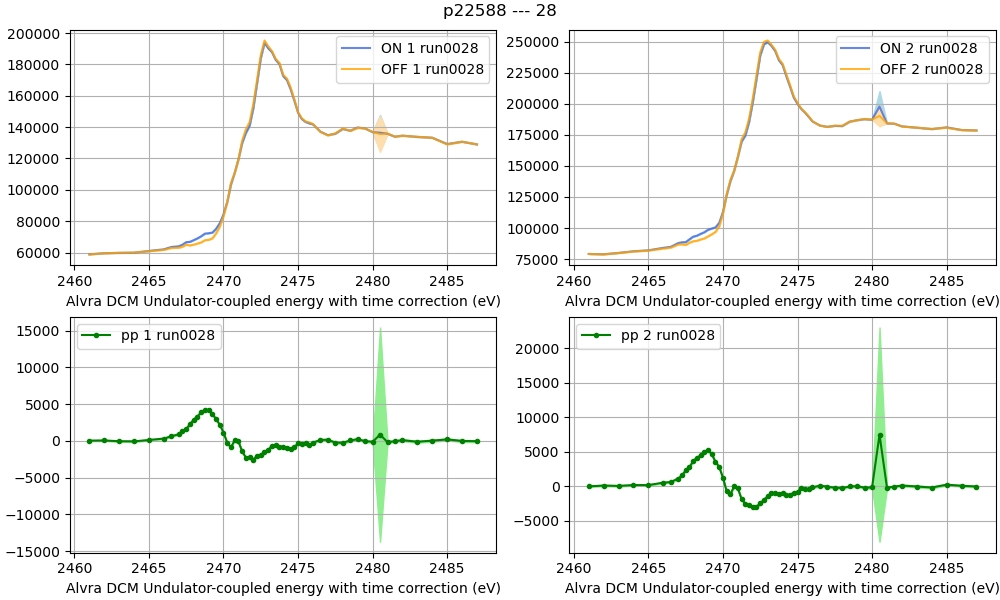

In [6]:
xanes.Plot_scan_simple()

## Load reduced data

In [3]:
pgroup = 'p22588'
Loaddir_name = ''

runlist = [28]
#runlist = np.arange(205, 225)
t0_offsets = [0]*len(runlist)
#t0_offsets = [50, 20]

withTT=False

##############################################
Loaddir = '/sf/alvra/data/{}/work/Test/{}/'.format(pgroup, Loaddir_name)
xanes = XANES_analysis(pgroup, Loaddir, runlist, withTT, t0_offsets)

will load run(s): [28]


16014 shots out of 60068 survived
(61,)


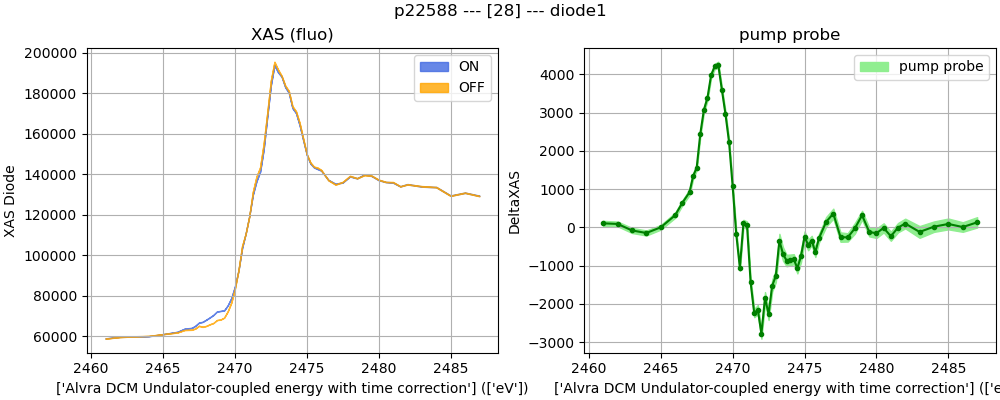

In [4]:
data, _ = xanes.load_reduced_data(switch_diodes=False)
#xanes.hist_reduced_data()
xanes.Rebin_and_filter_scanvar(quantile=0.5, threshold=0, n_sigma=5)
xanes.plot_filtered_data(data)